## CHURN PROJECT

Dean Sharon

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pwd

'C:\\Users\\dean8\\OneDrive\\Big Data Analyst\\Pyhton - Anaconda'

In [3]:
### change this to the path you downloded the file
path = "C:\\Users\\dean8\\OneDrive\\Big Data Analyst\\Pyhton - Anaconda"

In [4]:
dlo = pd.read_csv("%s\\churn.csv" % path).rename(columns=str.lower)

In [5]:
dlo

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning

orginaized data - Drop, Dummies, 0/1:

In [6]:
#drop:
dlo = dlo.drop(['customerid','phoneservice',], axis=1)


#Get dummies
dlo = pd.get_dummies(dlo, columns=['multiplelines','internetservice','contract']).rename(columns=str.lower)



dlo['customer_num'] = (dlo.index +1)

# 0\1:
dlo.loc[dlo.gender == 'Female', 'gender'] = 0
dlo.loc[dlo.gender == 'Male', 'gender'] = 1
dlo = dlo.astype({"gender": 'int64'})
dlo = dlo.rename({'gender': 'gender_male'}, axis='columns')

dlo.loc[dlo.partner == 'No', 'partner'] = 0
dlo.loc[dlo.partner == 'Yes', 'partner'] = 1
dlo = dlo.astype({"partner": 'int64'})

dlo.loc[dlo.dependents == 'No', 'dependents'] = 0
dlo.loc[dlo.dependents == 'Yes', 'dependents'] = 1
dlo = dlo.astype({"dependents": 'int64'})

dlo.loc[dlo.onlinesecurity == 'No internet service', 'onlinesecurity'] = 0
dlo.loc[dlo.onlinesecurity == 'No', 'onlinesecurity'] = 0
dlo.loc[dlo.onlinesecurity == 'Yes', 'onlinesecurity'] = 1
dlo = dlo.astype({"onlinesecurity": 'int64'})

dlo.loc[dlo.onlinebackup == 'No internet service', 'onlinebackup'] = 0
dlo.loc[dlo.onlinebackup == 'No', 'onlinebackup'] = 0
dlo.loc[dlo.onlinebackup == 'Yes', 'onlinebackup'] = 1
dlo = dlo.astype({"onlinebackup": 'int64'})

dlo.loc[dlo.deviceprotection == 'No internet service', 'deviceprotection'] = 0
dlo.loc[dlo.deviceprotection == 'No', 'deviceprotection'] = 0
dlo.loc[dlo.deviceprotection == 'Yes', 'deviceprotection'] = 1
dlo = dlo.astype({"deviceprotection": 'int64'})

dlo.loc[dlo.techsupport == 'No internet service', 'techsupport'] = 0
dlo.loc[dlo.techsupport == 'No', 'techsupport'] = 0
dlo.loc[dlo.techsupport == 'Yes', 'techsupport'] = 1
dlo = dlo.astype({"techsupport": 'int64'})

dlo.loc[dlo.streamingtv == 'No internet service', 'streamingtv'] = 0
dlo.loc[dlo.streamingtv == 'No', 'streamingtv'] = 0
dlo.loc[dlo.streamingtv == 'Yes', 'streamingtv'] = 1
dlo = dlo.astype({"streamingtv": 'int64'})

dlo.loc[dlo.streamingmovies == 'No internet service', 'streamingmovies'] = 0
dlo.loc[dlo.streamingmovies == 'No', 'streamingmovies'] = 0
dlo.loc[dlo.streamingmovies == 'Yes', 'streamingmovies'] = 1
dlo = dlo.astype({"streamingmovies": 'int64'})

dlo.loc[dlo.paperlessbilling == 'No', 'paperlessbilling'] = 0
dlo.loc[dlo.paperlessbilling == 'Yes', 'paperlessbilling'] = 1
dlo = dlo.astype({"paperlessbilling": 'int64'})

dlo.loc[dlo.churn == 'No', 'churn'] = 0
dlo.loc[dlo.churn == 'Yes', 'churn'] = 1
dlo = dlo.astype({"churn": 'int64'})

Add 2 columns

In [7]:
dlo.head()

,gender_male,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,multiplelines_no,multiplelines_no phone service,multiplelines_yes,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,customer_num
0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1,0,0,0,34,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,2
2,1,0,0,0,2,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,3
3,1,0,0,0,45,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,4
4,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,5


In [8]:
dlo.columns

Index(['gender_male', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'multiplelines_no',
       'multiplelines_no phone service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber optic',
       'internetservice_no', 'contract_month-to-month', 'contract_one year',
       'contract_two year', 'customer_num'],
      dtype='object')

In [9]:
dlo = dlo[['customer_num','gender_male', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod',
         'churn', 'multiplelines_no',
       'multiplelines_no phone service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber optic',
       'internetservice_no', 'contract_month-to-month', 'contract_one year',
       'contract_two year','monthlycharges']]
dlo.head()

,customer_num,gender_male,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,multiplelines_no,multiplelines_no phone service,multiplelines_yes,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,monthlycharges
0,1,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,29.85
1,2,1,0,0,0,34,1,0,1,0,...,1,0,0,1,0,0,0,1,0,56.95
2,3,1,0,0,0,2,1,1,0,0,...,1,0,0,1,0,0,1,0,0,53.85
3,4,1,0,0,0,45,1,0,1,1,...,0,1,0,1,0,0,0,1,0,42.30
4,5,0,0,0,0,2,0,0,0,0,...,1,0,0,0,1,0,1,0,0,70.70


In [10]:
dlo.isna().sum()

customer_num                      0
gender_male                       0
seniorcitizen                     0
partner                           0
dependents                        0
tenure                            0
onlinesecurity                    0
onlinebackup                      0
deviceprotection                  0
techsupport                       0
streamingtv                       0
streamingmovies                   0
paperlessbilling                  0
paymentmethod                     0
churn                             0
multiplelines_no                  0
multiplelines_no phone service    0
multiplelines_yes                 0
internetservice_dsl               0
internetservice_fiber optic       0
internetservice_no                0
contract_month-to-month           0
contract_one year                 0
contract_two year                 0
monthlycharges                    0
dtype: int64

In [11]:
tenure_in_years = pd.cut(dlo.tenure ,bins=[-1,12,24,36,48,60,80],labels=['0','1','2','3','4','5'])
dlo.insert(6,'tenure_years',tenure_in_years)

In [12]:
dlo['sumofservices'] = dlo.onlinesecurity + dlo.onlinebackup + dlo.deviceprotection + dlo.techsupport + dlo.streamingtv + dlo.streamingmovies

Text(0, 0.5, 'Percent')

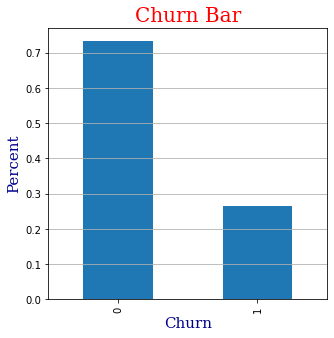

In [13]:
plt.figure(figsize=(5,5))
dlo.churn.value_counts(normalize=True).plot(kind='bar');
dlo.churn.value_counts(normalize=True)
plt.grid(axis = 'y')
f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}
plt.title("Churn Bar", fontdict = f1)
plt.xlabel("Churn", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

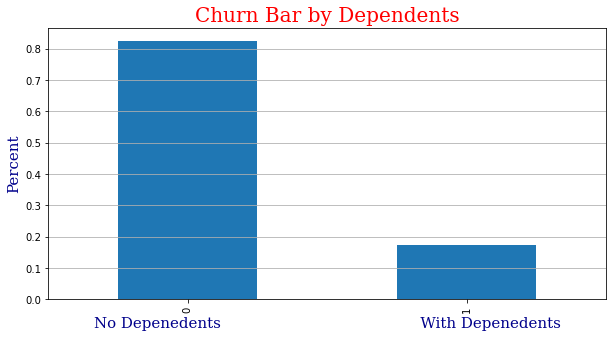

In [14]:
didchurn = dlo[dlo.churn==1]

plt.figure(figsize=(10,5))

didchurn.dependents.value_counts(normalize=True).sort_index().plot(kind='bar');
didchurn.dependents.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Dependents", fontdict = f1)
plt.xlabel("No Depenedents                                          With Depenedents", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

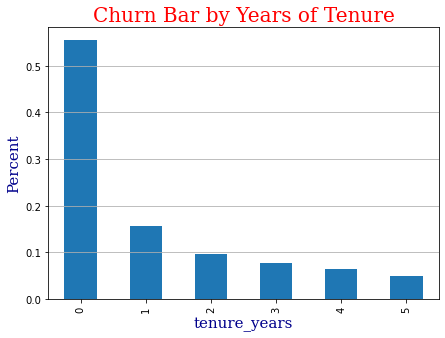

In [15]:
plt.figure(figsize=(7,5))

didchurn.tenure_years.value_counts(normalize=True).plot(kind='bar');
didchurn.tenure_years.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Years of Tenure", fontdict = f1)
plt.xlabel("tenure_years", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

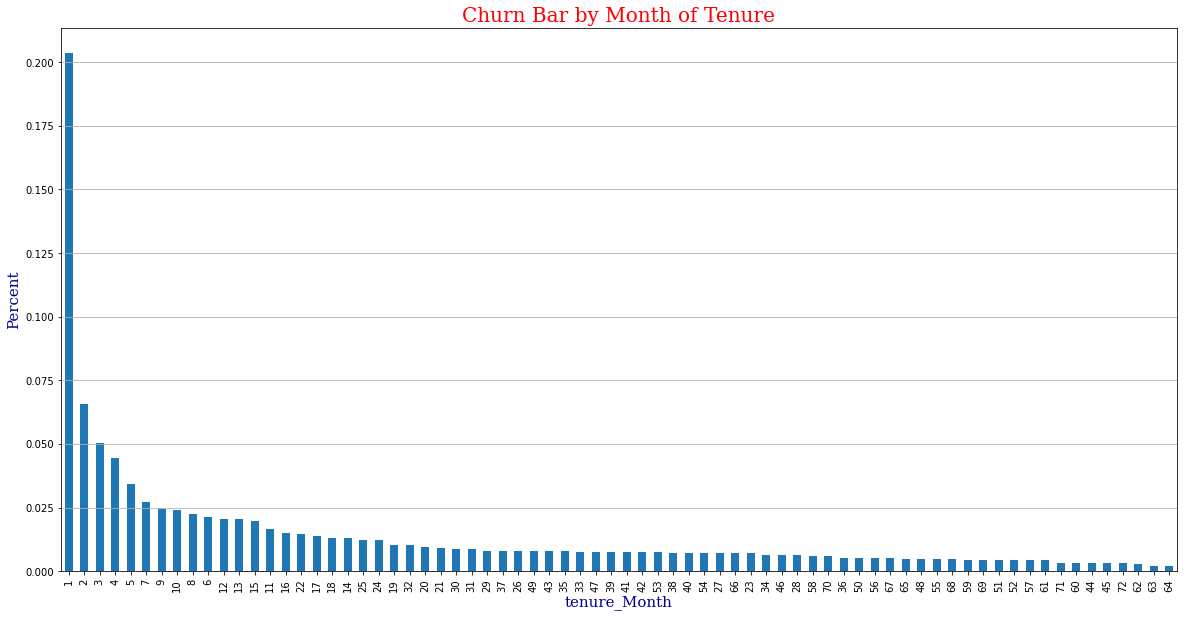

In [16]:
plt.figure(figsize=(20,10))

didchurn.tenure.value_counts(normalize=True).plot(kind='bar');
didchurn.tenure.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Month of Tenure", fontdict = f1)
plt.xlabel("tenure_Month", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

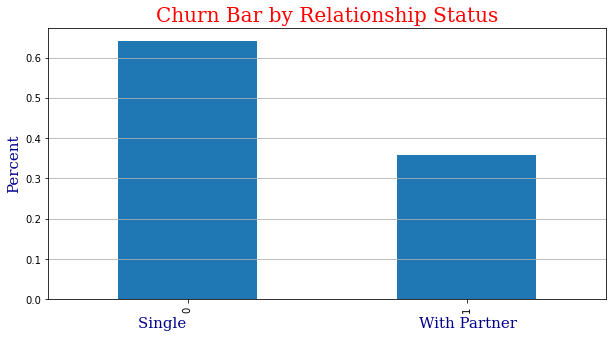

In [17]:
plt.figure(figsize=(10,5))

didchurn.partner.value_counts(normalize=True).sort_index().plot(kind='bar');
didchurn.partner.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Relationship Status", fontdict = f1)
plt.xlabel("Single                                                 With Partner", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

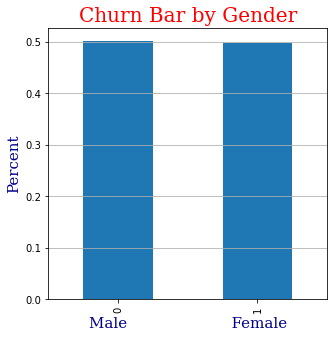

In [18]:
plt.figure(figsize=(5,5))

didchurn.gender_male.value_counts(normalize=True).sort_index().plot(kind='bar');
didchurn.gender_male.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Gender", fontdict = f1)
plt.xlabel("Male                      Female", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

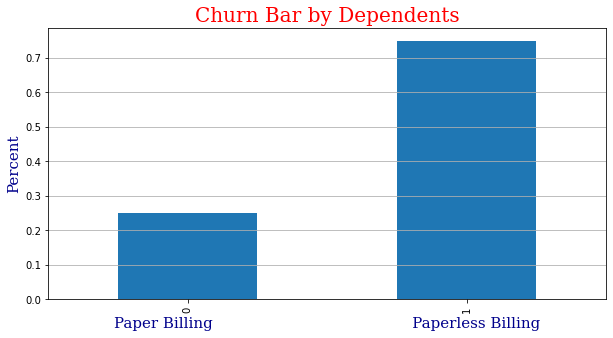

In [19]:
plt.figure(figsize=(10,5))

didchurn.paperlessbilling.value_counts(normalize=True).sort_index().plot(kind='bar');
didchurn.paperlessbilling.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Dependents", fontdict = f1)
plt.xlabel("Paper Billing                                          Paperless Billing", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

Text(0, 0.5, 'Percent')

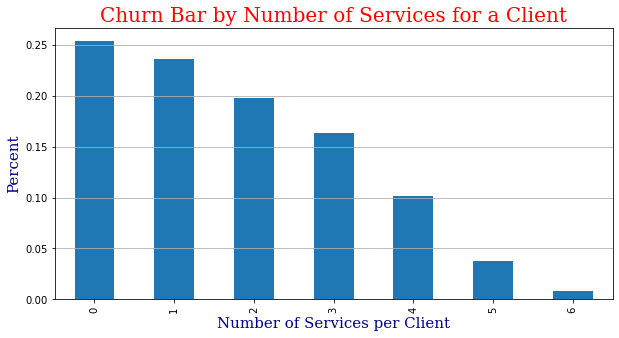

In [20]:
plt.figure(figsize=(10,5))

didchurn.sumofservices.value_counts(normalize=True).sort_index().plot(kind='bar');
didchurn.sumofservices.value_counts(normalize=True)


f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}

plt.grid(axis = 'y')
plt.title("Churn Bar by Number of Services for a Client", fontdict = f1)
plt.xlabel("Number of Services per Client", fontdict = f2)
plt.ylabel("Percent", fontdict = f2)

In [21]:
dlo.corr()['churn']

customer_num                      0.010286
gender_male                      -0.008612
seniorcitizen                     0.150889
partner                          -0.150448
dependents                       -0.164221
tenure                           -0.352229
onlinesecurity                   -0.171226
onlinebackup                     -0.082255
deviceprotection                 -0.066160
techsupport                      -0.164674
streamingtv                       0.063228
streamingmovies                   0.061382
paperlessbilling                  0.191825
churn                             1.000000
multiplelines_no                 -0.032569
multiplelines_no phone service   -0.011942
multiplelines_yes                 0.040102
internetservice_dsl              -0.124214
internetservice_fiber optic       0.308020
internetservice_no               -0.227890
contract_month-to-month           0.405103
contract_one year                -0.177820
contract_two year                -0.302253
monthlychar

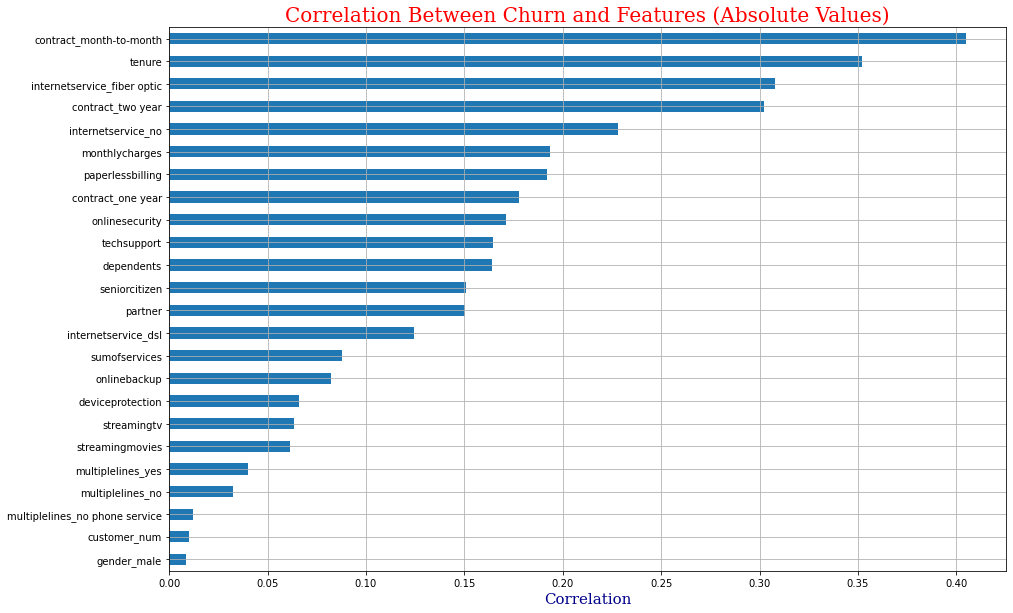

In [22]:
plt.figure(figsize=(15,10))

f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}


plt.title("Correlation Between Churn and Features (Absolute Values)", fontdict = f1)
plt.xlabel("Correlation", fontdict = f2)
abs(dlo.corr())['churn'].drop('churn').sort_values().plot(kind='barh')
plt.grid(axis = 'y')
plt.grid(axis = 'x')

Text(0, 0.5, 'Churn Rate')

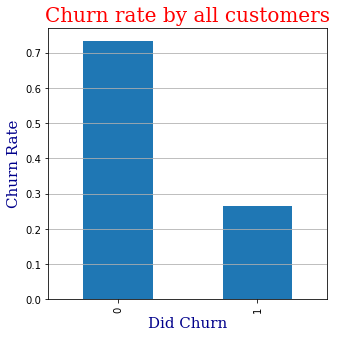

In [23]:
plt.figure(figsize=(5,5))
dlo.churn.value_counts(normalize=True).plot(kind='bar');
dlo.churn.value_counts(normalize=True)
plt.grid(axis = 'y')
f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}
plt.title("Churn rate by all customers", fontdict = f1)
plt.xlabel("Did Churn", fontdict = f2)
plt.ylabel("Churn Rate", fontdict = f2)

In [24]:
dlo.dtypes

customer_num                         int64
gender_male                          int64
seniorcitizen                        int64
partner                              int64
dependents                           int64
tenure                               int64
tenure_years                      category
onlinesecurity                       int64
onlinebackup                         int64
deviceprotection                     int64
techsupport                          int64
streamingtv                          int64
streamingmovies                      int64
paperlessbilling                     int64
paymentmethod                       object
churn                                int64
multiplelines_no                     uint8
multiplelines_no phone service       uint8
multiplelines_yes                    uint8
internetservice_dsl                  uint8
internetservice_fiber optic          uint8
internetservice_no                   uint8
contract_month-to-month              uint8
contract_on

In [25]:
# Cut the first letter or if "Nan" then "Missing"
first_letter_or_nan = dlo.paymentmethod.fillna('Missing')
dlo.groupby(first_letter_or_nan).churn.mean().sort_values()

paymentmethod
Credit card (automatic)      0.152431
Bank transfer (automatic)    0.167098
Mailed check                 0.191067
Electronic check             0.452854
Name: churn, dtype: float64

Text(0, 0.5, 'Payment Method')

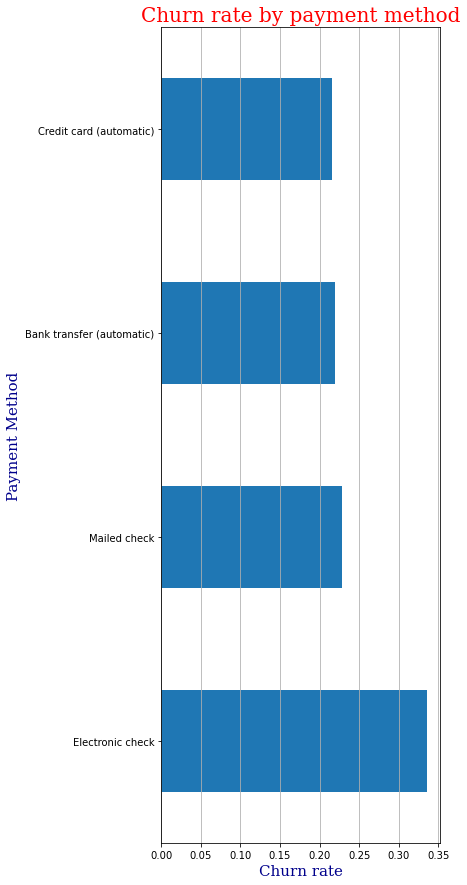

In [26]:
plt.figure(figsize=(5,15))
dlo.paymentmethod.value_counts(normalize=True).plot(kind='barh');
dlo.paymentmethod.value_counts(normalize=True)
plt.grid(axis = 'x')
f1 = {'family':'serif','color':'red','size':20}
f2 = {'family':'serif','color':'darkblue','size':15}
plt.title("Churn rate by payment method", fontdict = f1)
plt.xlabel("Churn rate", fontdict = f2)
plt.ylabel("Payment Method", fontdict = f2)

In [27]:
dlo.groupby(first_letter_or_nan).churn.sum().sort_values()

paymentmethod
Credit card (automatic)       232
Bank transfer (automatic)     258
Mailed check                  308
Electronic check             1071
Name: churn, dtype: int64

In [28]:
dlo['has_electronic_check'] = np.where(dlo['paymentmethod']=='Electronic check',1,0)
dlo = dlo.drop(['paymentmethod'], axis=1)
dlo.head()

,customer_num,gender_male,seniorcitizen,partner,dependents,tenure,tenure_years,onlinesecurity,onlinebackup,deviceprotection,...,multiplelines_yes,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,monthlycharges,sumofservices,has_electronic_check
0,1,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,29.85,1,1
1,2,1,0,0,0,34,2,1,0,1,...,0,1,0,0,0,1,0,56.95,2,0
2,3,1,0,0,0,2,0,1,1,0,...,0,1,0,0,1,0,0,53.85,2,0
3,4,1,0,0,0,45,3,1,0,1,...,0,1,0,0,0,1,0,42.30,3,0
4,5,0,0,0,0,2,0,0,0,0,...,0,0,1,0,1,0,0,70.70,0,1


In [29]:
dlo.dtypes

customer_num                         int64
gender_male                          int64
seniorcitizen                        int64
partner                              int64
dependents                           int64
tenure                               int64
tenure_years                      category
onlinesecurity                       int64
onlinebackup                         int64
deviceprotection                     int64
techsupport                          int64
streamingtv                          int64
streamingmovies                      int64
paperlessbilling                     int64
churn                                int64
multiplelines_no                     uint8
multiplelines_no phone service       uint8
multiplelines_yes                    uint8
internetservice_dsl                  uint8
internetservice_fiber optic          uint8
internetservice_no                   uint8
contract_month-to-month              uint8
contract_one year                    uint8
contract_tw

In [30]:
dlo = dlo.astype(float)
dlo.dtypes

customer_num                      float64
gender_male                       float64
seniorcitizen                     float64
partner                           float64
dependents                        float64
tenure                            float64
tenure_years                      float64
onlinesecurity                    float64
onlinebackup                      float64
deviceprotection                  float64
techsupport                       float64
streamingtv                       float64
streamingmovies                   float64
paperlessbilling                  float64
churn                             float64
multiplelines_no                  float64
multiplelines_no phone service    float64
multiplelines_yes                 float64
internetservice_dsl               float64
internetservice_fiber optic       float64
internetservice_no                float64
contract_month-to-month           float64
contract_one year                 float64
contract_two year                 

############################################################################################

# ALGO!!!

############################################################################################

# Train / Test Split

In [31]:
dlo.shape

(7043, 27)

In [32]:
from sklearn.model_selection import train_test_split
test_size = 1400
train, test = train_test_split(dlo, test_size=test_size, random_state=0, shuffle=True)

label = 'churn'
psn = 'customer_num' ### New

x_train = train.drop(label, axis=1)
x_train = x_train.drop(psn, axis=1) ### New
y_train = train[label]
psn_train = train[psn] ### New

x_test = test.drop(label, axis=1)
x_test = x_test.drop(psn, axis=1) ### New
y_test = test[label]
psn_test = test[psn] ### New

In [33]:
x_train.shape, y_train.shape, psn_train.shape, x_test.shape, y_test.shape, psn_test.shape

((5643, 25), (5643,), (5643,), (1400, 25), (1400,), (1400,))

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test) 

output = pd.DataFrame({'customer_num': psn_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})
output.to_csv('my_DecisionTree_Prediction.csv', index=False) 

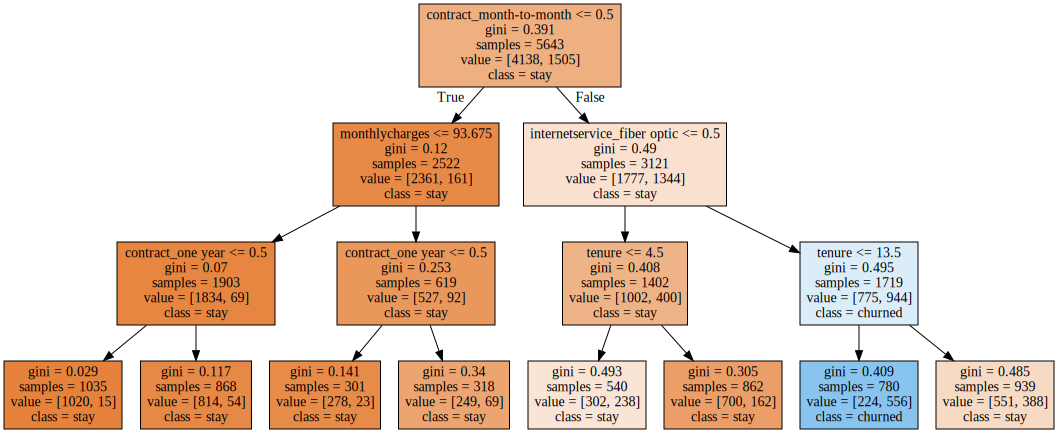

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['stay', 'churned'])

In [36]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

# Decision Tree Accuracy

In [37]:
# Decision Tree -- max_depth = 3 (like before)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7792857142857142

In [38]:
# Decision Tree -- max_depth = 5 (like before)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.785

In [39]:
# Decision Tree -- max_depth = 20 (like before)

clf = DecisionTreeClassifier(max_depth=20)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7407142857142858

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customer_num': psn_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv

In [41]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([7.26155064e-05, 4.98511225e-03, 2.46290316e-03, 5.72814649e-03,
       1.93240851e-01, 1.11742225e-01, 1.47374091e-02, 1.29298419e-03,
       9.02359517e-06, 1.50915509e-02, 3.20770964e-03, 1.39212177e-03,
       1.63611465e-02, 1.23296773e-03, 8.64817262e-04, 3.84693057e-03,
       1.30620466e-02, 1.29448540e-01, 4.41298770e-02, 2.09376435e-01,
       2.60344739e-02, 7.93617853e-02, 4.42625498e-02, 1.01717725e-02,
       6.78840059e-02])

In [42]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
19,contract_month-to-month,0.209376
4,tenure,0.193241
17,internetservice_fiber optic,0.129449
5,tenure_years,0.111742
21,contract_two year,0.079362
24,has_electronic_check,0.067884
22,monthlycharges,0.044263
18,internetservice_no,0.044130
20,contract_one year,0.026034
12,paperlessbilling,0.016361


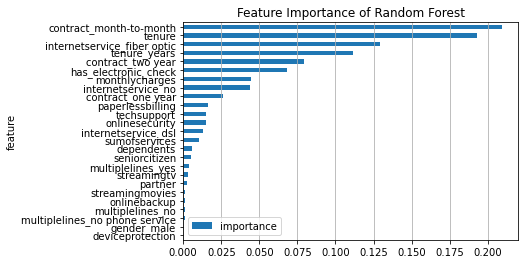

In [43]:
stats_sort = stats.sort_values('importance', ascending=True)

stats_sort.plot(y='importance', x='feature', kind='barh')
plt.grid(axis = 'x')
plt.title('Feature Importance of Random Forest');

# Random Forest Accuracy

In [44]:
# Random Forest -- n_estimators = 20 & max_depth = 5 (like before)

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7942857142857143

In [45]:
# Random Forest -- n_estimators = 100 & max_depth = 5 (like before)

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7885714285714286

In [46]:
# Random Forest -- n_estimators = 200 & max_depth = 5 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7892857142857143

# KNN - K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customer_num': psn_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv

Scaling

In [48]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customer_num': psn_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn, 'churn_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) # saving results to csv


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7971428571428572

# KNN Accuracy - Not Scaled

In [49]:
# Knn -- n_neighbors = 10 (like before)

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7828571428571428

In [50]:
# Knn -- n_neighbors = 50 (like before)

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7757142857142857

In [51]:
# Knn -- n_neighbors = 100 (like before)

clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7742857142857142

# KNN Accuracy - Scaled

In [52]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train_scaled, y_train)
y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7778571428571428

In [53]:
clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(x_train_scaled, y_train)
y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7971428571428572

In [54]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(x_train_scaled, y_train)
y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7914285714285715

# Evaluation + Benchmark

In [55]:
y_train.value_counts()

0.0    4138
1.0    1505
Name: churn, dtype: int64

In [56]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 1

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not Survived

array([1., 1., 1., ..., 1., 1., 1.])

In [57]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.26

### Our model results:
Decision tree best accuracy Result: 82.5%<br>
Random Forest best accuracy Result: 84%<br>
Knn best accuracy Result (before standardization): 78.5%<br>
Knn best accuracy Result (after standardization): 81.5%<br>
## The performance on test is 62.5%, we can see, that any of our algorithms beat the benchmark performance